50
100
105
255


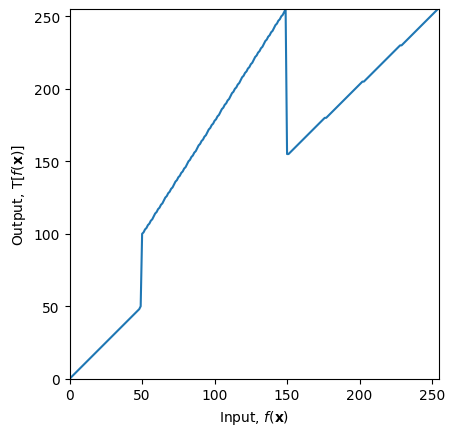

In [ ]:
# Intensity Windowing
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


t1 = np.linspace(0, 50, 50).astype('uint8')
print(len(t1))
t2 = np.linspace(100, 255, 100).astype('uint8')
print(len(t2))
t3 = np.linspace(155, 255, 105).astype('uint8')
print(len(t3)) 
 
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal') 
plt.show()


img_orig = cv.imread('images/katrina.jpg', cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", img_orig)
cv.waitKey(0)
image_transformed = cv.LUT(img_orig, transform)
cv.imshow("Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

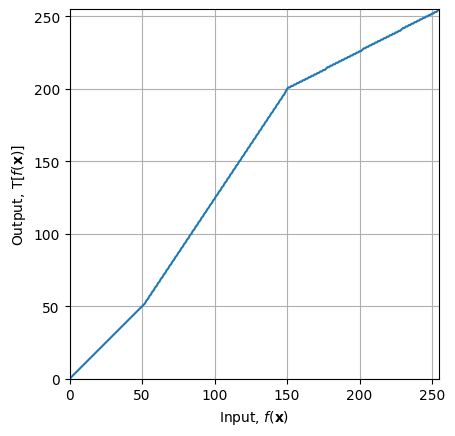

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def transform(c):
    """
    Generates a piecewise linear intensity transform function based on control points c.

    Parameters:
    c: np.array of shape (2, 2) like [(x1, y1), (x2, y2)]
       where:
       - 0 to x1 maps to 0 to y1
       - x1 to x2 maps to y1+1 to y2
       - x2 to 255 maps to y2+1 to 255

    Returns:
    transform_map: np.array of shape (256,) mapping input intensities to output
    """

    t1 = np.linspace(0, c[0,1], c[0,0] + 1).astype('uint8')  # 0 to x1 → 0 to y1
    t2 = np.linspace(c[0,1]+1, c[1,1], c[1,0] - c[0,0]).astype('uint8')  # x1+1 to x2 → y1+1 to y2
    t3 = np.linspace(c[1,1]+1, 255, 256 - c[1,0] - 1).astype('uint8')  # x2+1 to 255 → y2+1 to 255

    transform_map = np.concatenate((t1, t2, t3)).astype('uint8')
    return transform_map

# Example usage:
c = np.array([(50, 50), (150, 200)])  # Change these values as needed
mapping = transform(c)

plt.plot(mapping)
plt.xlabel(r'Input, $f(\mathbf{x})$')
plt.ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.gca().set_aspect('equal')
plt.grid(True)
plt.show()

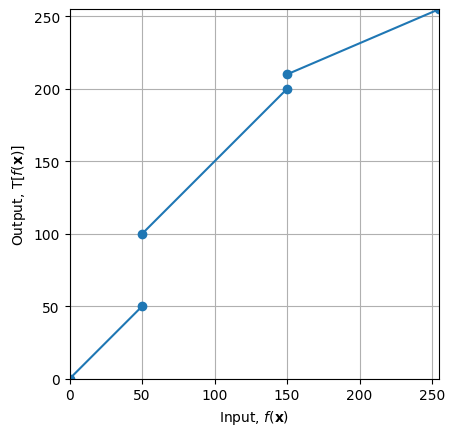

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define x and y values with NaNs in between to break the line
x = [0, 50, np.nan, 50, 150, np.nan, 150, 255]
y = [0, 50, np.nan, 100, 200, np.nan, 210, 255]

# Plot
fig, ax = plt.subplots()
ax.plot(x, y, marker='o')

# Labels and appearance
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel(r'Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.grid(True)
plt.show()



In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Generate values for each range
x1 = np.linspace(0, 50, 100)
y1 = [transform(x) for x in x1]

x2 = np.linspace(50, 150, 100)
y2 = [transform(x) for x in x2]

x3 = np.linspace(150, 255, 100)
y3 = [transform(x) for x in x3]

# Plot each segment
plt.plot(x1, y1, label='0-50')
plt.plot(x2, y2, label='50-150')
plt.plot(x3, y3, label='150-255')

# Add vertical lines to show discontinuities
plt.vlines(x=50, ymin=transform(50), ymax=transform(50 + 1e-5), colors='red', linestyles='dashed')
plt.vlines(x=150, ymin=transform(150), ymax=transform(150 + 1e-5), colors='red', linestyles='dashed')

plt.xlabel('Input intensity')
plt.ylabel('Output intensity')
plt.title('Piecewise Transform with Discontinuities')
plt.grid(True)
plt.legend()
plt.show()



IndexError: invalid index to scalar variable.